# Speaker separation using source approximation masking models

In [1]:
# homegrown module with masking methods for speaker separation
import masks

In [2]:
import numpy as np
import librosa
from IPython.display import Audio
from scipy.signal import stft, istft

import matplotlib.pyplot as plt
%matplotlib inline

## Load and verify audio signals 

### Isolated speaker 1

In [3]:
path = '/Users/jgisrael/Box/wsj0-mix-subset/2spk8kmax/cv/s1/015a010u_2.339_206a010x_-2.339.wav'
S1, sr = librosa.load(path)
Audio(S1, rate=sr)

### Isolated speaker 2

In [4]:
path = '/Users/jgisrael/Box/wsj0-mix-subset/2spk8kmax/cv/s2/015a010u_2.339_206a010x_-2.339.wav'
S2, sr = librosa.load(path)
Audio(S2, rate=sr)

### Mixed signal from combination of corresponding speaker 1 and speaker 2 signals

In [5]:
path = '/Users/jgisrael/Box/wsj0-mix-subset/2spk8kmax/cv/mix/015a010u_2.339_206a010x_-2.339.wav'
X, sr = librosa.load(path)
Audio(X, rate=sr)

## Apply STFT and represent signals as a spectrogram

### STFT transformation of three source signals

In [6]:
_,_,Z1 = stft(S1)
_,_,Z2 = stft(S2)
_,_,ZX = stft(X)

### Spectrogram of the clean and mixed signals

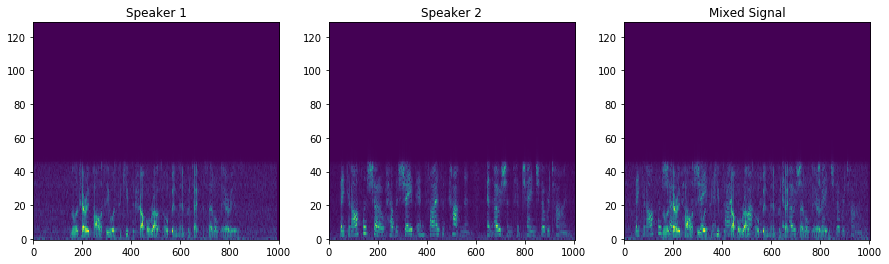

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(15,4))

ax[0].imshow(abs(Z1)**.5, aspect='auto', origin='lower')
ax[0].set_title('Speaker 1')
#ax[0].set_ylim(0,45)
ax[1].imshow(abs(Z2)**.5, aspect='auto', origin='lower')
#ax[1].set_ylim(0,45)
ax[1].set_title('Speaker 2')
ax[2].imshow(abs(ZX)**.5, aspect='auto', origin='lower')
#ax[2].set_ylim(0,45)
ax[2].set_title('Mixed Signal');

## Separate speaker 1 audio using NMF mask

### Represent spectrogram of clean audio as combination of basis vectors (W) and temporal activations (H)

In [8]:
W1,H1 = masks.NMF(Z1)
W2,H2 = masks.NMF(Z2)

### Determine the temporal activations (H) in mixed signal that correspond to basis vectors in each clean signal

In [9]:
W1W2H, W1W2 = masks.NMFH(ZX, W1, W2)

### Apply NMF mask to mixed audio signal to separate speakers

In [10]:
speaker1, speaker2 = masks.NMFtransform(W1W2H, W1W2, W1, W2, ZX)

In [11]:
Audio(speaker1, rate=sr)

### Calculate SNR of recovered audio

In [12]:
NMF_SNR = masks.SNR(speaker1, X)

## Separate speaker 1 audio using IRM mask

In [13]:
speaker1 = masks.IRM(Z1, ZX)

In [14]:
Audio(speaker1, rate=sr)

In [15]:
IRM_SNR = masks.SNR(speaker1, X)

## Separate speaker 1 audio using cIRM mask

In [16]:
speaker1 = masks.cIRM(Z1, ZX)

In [17]:
Audio(speaker1, rate=sr)

In [18]:
cIRM_SNR = masks.SNR(speaker1, X)

## Results

In [19]:
import pandas as pd
res = pd.DataFrame(columns=['Model', 'SNR'])
res.loc[len(res)] = ['NMF',NMF_SNR]
res.loc[len(res)] = ['IRM',IRM_SNR]
res.loc[len(res)] = ['cIRM',cIRM_SNR]
res

,Model,SNR
0,NMF,-0.354098
1,IRM,5.263410
2,cIRM,5.279619
